In [203]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(color_codes=True)
%matplotlib inline

## Reading the data
We use the pandas' `read_csv` method to read the data file into in pandas `DataFrame`.

In [173]:
df = pd.read_csv('data/iris.data')

## Part A
Chosen features: sepal length in CM (X) and petal length in CM (Y)

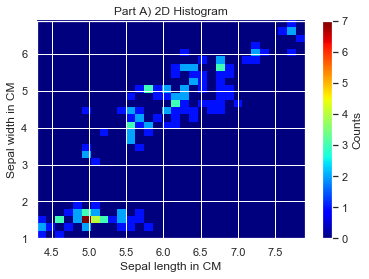

In [196]:
X = df.values[:, 0]
Y = df.values[:, 2]

plt.figure()
plt.hist2d(X, Y, bins=30, cmap=plt.cm.jet)
plt.xlabel('Sepal length in CM')
plt.ylabel('Sepal width in CM')
plt.title('Part A) 2D Histogram')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()

## Part B
Chosen features: sepal length in CM (X) and petal length in CM (Y)

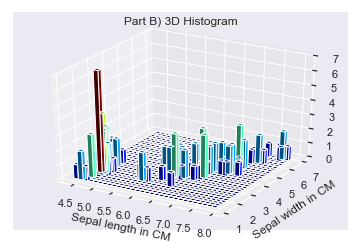

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(X, Y, bins=30)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like(xpos)

dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()

cmap = plt.cm.get_cmap('jet')
max_height = np.max(dz)
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.xlabel('Sepal length in CM')
plt.ylabel('Sepal width in CM')
plt.title('Part B) 3D Histogram')
plt.show()

## Part C
Scatter plot of two features: sepal length in CM (X) and petal length CM (Y)

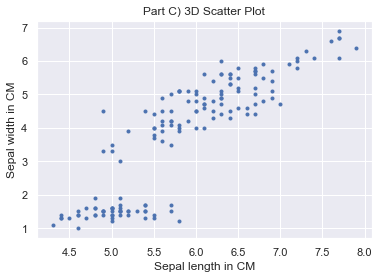

In [200]:
plt.scatter(X, Y, c='b', marker='.')
plt.xlabel('Sepal length in CM')
plt.ylabel('Petal Length in CM')
plt.title('Part C) 3D Scatter Plot')
plt.show()

## Part D
Mean and variances

In [177]:
df.columns = ['Sepal Length in CM', 'Sepal Width in CM', 
              'Petal Length in CM', 'Petal Width in CM', 'Class']
print 'Means:'
print df.mean()

print '\nVariances:'
print df.var()

Means:
Sepal Length in CM    5.848322
Sepal Width in CM     3.051007
Petal Length in CM    3.774497
Petal Width in CM     1.205369
dtype: float64

Variances:
Sepal Length in CM    0.686568
Sepal Width in CM     0.187921
Petal Length in CM    3.096372
Petal Width in CM     0.579566
dtype: float64


## Part E
Covariance between sepal length and petal length

In [178]:
print 'Covariance between sepal length and sepal width:'
np.cov(X.tolist(), Y.tolist())

Covariance between sepal length and sepal width:


array([[0.68656811, 1.27036233],
       [1.27036233, 3.09637221]])

## Part F
Correlation between sepal length and petal length

In [179]:
np.corrcoef(X.tolist(), Y.tolist())

array([[1.        , 0.87128294],
       [0.87128294, 1.        ]])

## Part G
Correlation of features in data related to virginica plant. 

In [202]:
virginica_items = df[df['Class'] == 'Iris-virginica']
virginica_items.corr()

,Sepal Length in CM,Sepal Width in CM,Petal Length in CM,Petal Width in CM
Sepal Length in CM,1.000000,0.457228,0.864225,0.281108
Sepal Width in CM,0.457228,1.000000,0.401045,0.537728
Petal Length in CM,0.864225,0.401045,1.000000,0.322108
Petal Width in CM,0.281108,0.537728,0.322108,1.000000


As visible in the table, the correlation between `Petal Length in CM` and `Sepal Length in CM`
has the most value between two distinct features (0.864225). So we can say that these two features have the most similarity between these four features for the virginica plant.

## Part H
Choosing one feature for recognizing plant type.

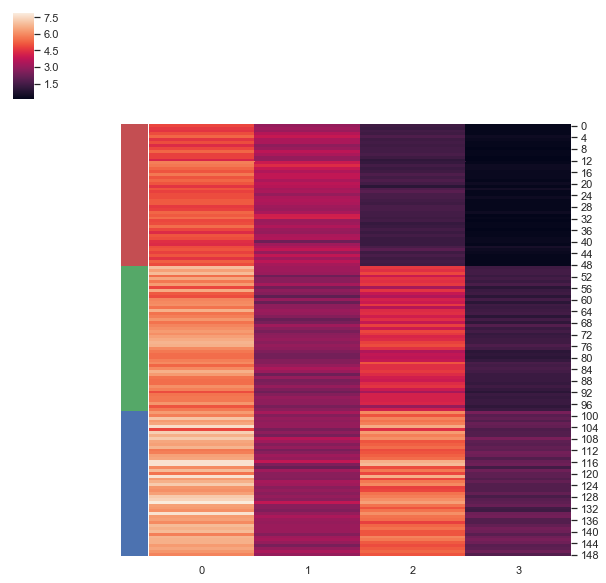

In [193]:
mapper = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
colored_df = df.replace({"Class": mapper})

sns.clustermap(colored_df.values[:, :4].tolist(), row_colors=colored_df.values[:, -1].tolist(), 
               row_cluster=False, col_cluster=False, metric="correlation")
plt.show()

We visualize the correlation heatmap to choose the best representing feature for the target classes.
The bar to the left of the table, represents the classes.
The more the correleation heatmap varies for each feature (each column in the table), the more representative it is for detecting the class of the plant based on that feature.
As it can be seen, the third column, which corresponds to the `Petal Length in CM` feature,  has the most variaty between the columns and thus, *Petal Length in CM* gives the best results for detecting the plan classes (among these four) if we have to detect the classes based on one feature.